In [1]:
# Import necessary libraries and modules
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\abhay\Downloads\data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df = df.drop(["customerID"], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().sum()

22

In [6]:
# Check for duplicates
duplicates = df[df.duplicated(keep=False)]


# Remove duplicates
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame without duplicates
df_no_duplicates

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df_no_duplicates.duplicated().sum()

0

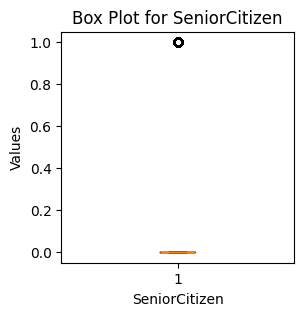

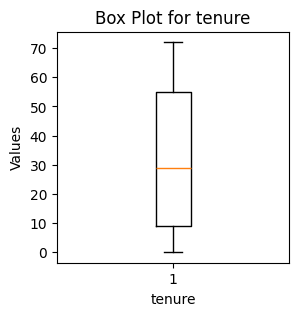

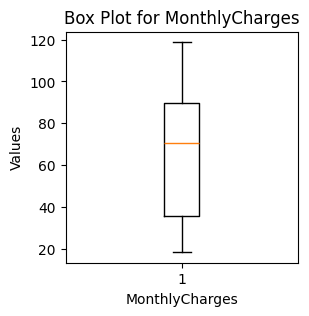

In [8]:
# Select numeric columns
numeric_columns = df_no_duplicates.select_dtypes(include='number')

# Create box plots for all numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(3, 3))
    plt.boxplot(numeric_columns[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
plt.show()   

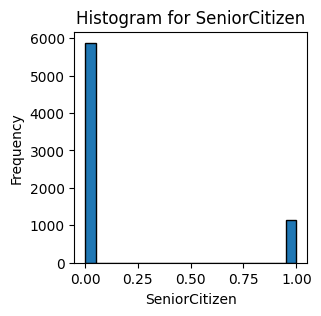

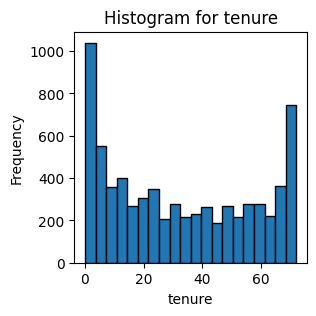

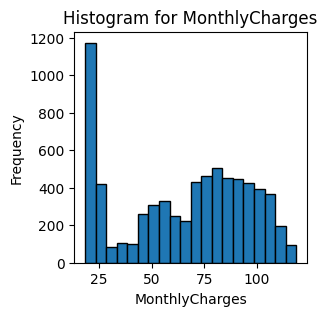

In [9]:
# Select numeric columns
numeric_columns = df_no_duplicates.select_dtypes(include='number')

# Create histograms for all numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(3, 3))
    plt.hist(numeric_columns[column], bins=20, edgecolor='k')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.show()   

In [10]:
# Categorical columns to be label encoded
label_encode_columns = ['MultipleLines', 'Dependents', 'PhoneService', 'OnlineSecurity', 
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                        'StreamingMovies', 'PaperlessBilling', 'Churn', 'Partner']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode the selected columns
for col in label_encode_columns:
    df_no_duplicates[col] = label_encoder.fit_transform(df_no_duplicates[col])

df_no_duplicates = pd.get_dummies(df_no_duplicates, columns=['InternetService'])

C:\Users\abhay\AppData\Local\Temp\ipykernel_16964\1585290182.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates[col] = label_encoder.fit_transform(df_no_duplicates[col])
C:\Users\abhay\AppData\Local\Temp\ipykernel_16964\1585290182.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates[col] = label_encoder.fit_transform(df_no_duplicates[col])
C:\Users\abhay\AppData\Local\Temp\ipykernel_16964\1585290182.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [11]:
df_no_duplicates

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,Female,0,1,0,1,0,1,0,2,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,True,False,False
1,Male,0,0,0,34,1,0,2,0,2,...,0,One year,0,Mailed check,56.95,1889.5,0,True,False,False
2,Male,0,0,0,2,1,0,2,2,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,True,False,False
3,Male,0,0,0,45,0,1,2,0,2,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,True,False,False
4,Female,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,2,2,0,2,...,2,One year,1,Mailed check,84.80,1990.5,0,True,False,False
7039,Female,0,1,1,72,1,2,0,2,2,...,2,One year,1,Credit card (automatic),103.20,7362.9,0,False,True,False
7040,Female,0,1,1,11,0,1,2,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,True,False,False
7041,Male,1,1,0,4,1,2,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.6,1,False,True,False


In [12]:
# Define the order of categories
categories_order = ['Month-to-month', 'One year', 'Two year']

# Initialize the OrdinalEncoder with the defined order
encoder = OrdinalEncoder(categories=[categories_order])

# Fit and transform the 'Contract' column
df_no_duplicates['Contract'] = encoder.fit_transform(df_no_duplicates[['Contract']])

In [13]:
df_no_duplicates = pd.get_dummies(df_no_duplicates, columns=['PaymentMethod'])

In [14]:
df_no_duplicates['gender'] = pd.factorize(df_no_duplicates['gender'])[0]

In [15]:
df_no_duplicates['TotalCharges'] = pd.to_numeric(df_no_duplicates['TotalCharges'], errors='coerce')

In [16]:
df_no_duplicates

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,2,0,...,29.85,29.85,0,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,2,0,2,...,56.95,1889.50,0,True,False,False,False,False,False,True
2,1,0,0,0,2,1,0,2,2,0,...,53.85,108.15,1,True,False,False,False,False,False,True
3,1,0,0,0,45,0,1,2,0,2,...,42.30,1840.75,0,True,False,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,2,0,2,...,84.80,1990.50,0,True,False,False,False,False,False,True
7039,0,0,1,1,72,1,2,0,2,2,...,103.20,7362.90,0,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,1,2,0,0,...,29.60,346.45,0,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,2,0,0,0,...,74.40,306.60,1,False,True,False,False,False,False,True


In [17]:
# Find and print the names of columns with string values
string_columns = [col for col in df_no_duplicates.columns if df_no_duplicates[col].dtype == 'object']

print("Columns with string values:")
for col in string_columns:
    print(col)

Columns with string values:


In [18]:
df_no_duplicates.isnull().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
Contract                                    0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
PaymentMethod_Bank transfer (autom

In [19]:
df_no_duplicates['TotalCharges'] = df_no_duplicates['TotalCharges'].mean()

In [20]:
df_no_duplicates.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
Contract                                   0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
PaymentMethod_Bank transfer (automatic)    0
PaymentMet

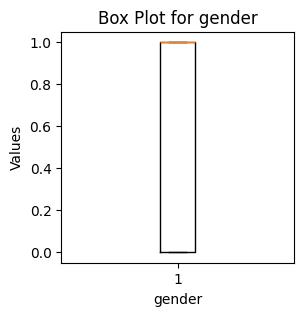

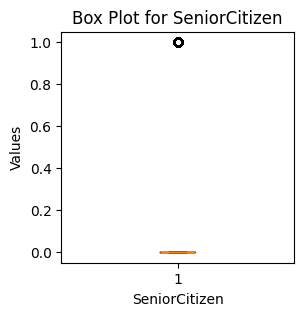

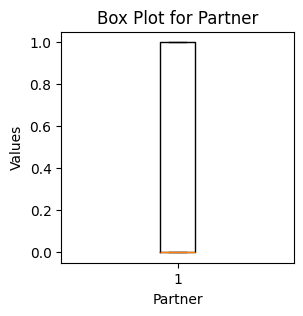

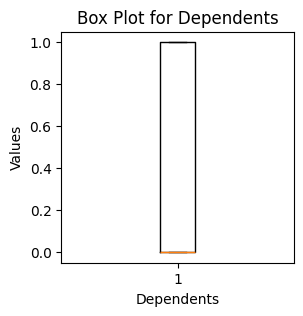

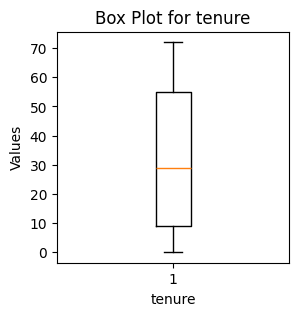

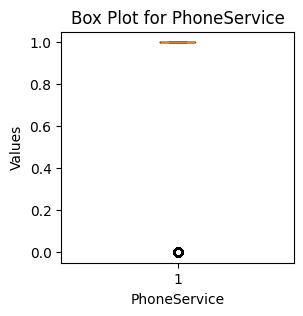

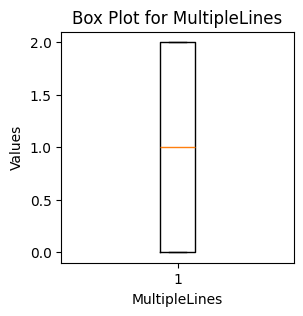

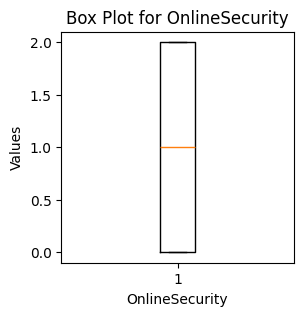

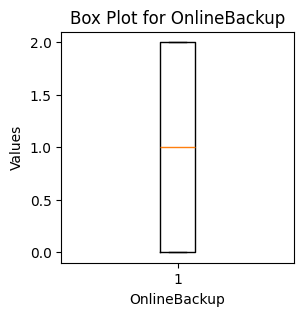

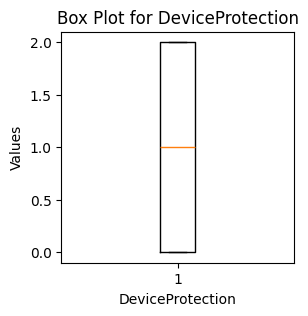

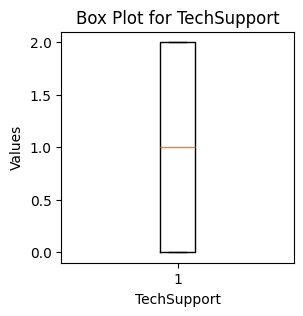

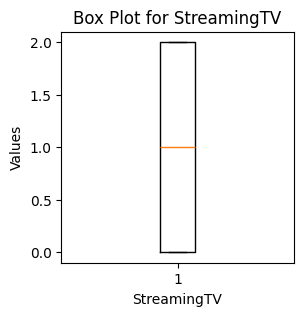

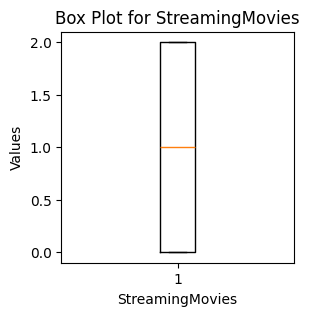

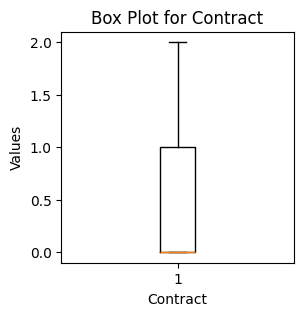

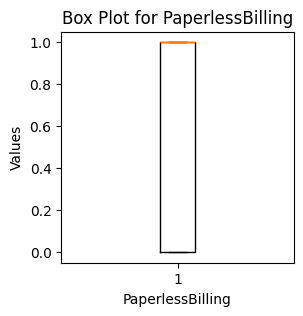

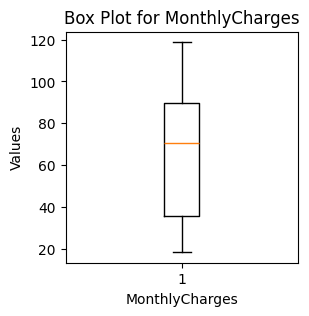

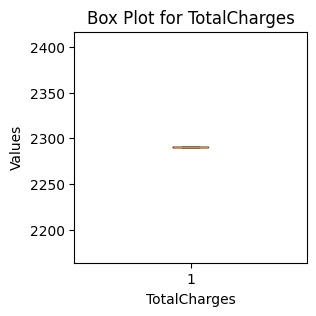

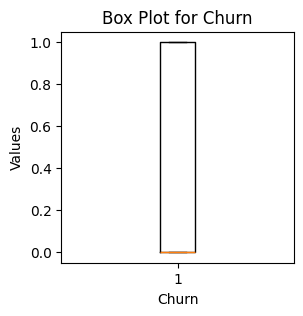

In [21]:
# Select numeric columns
numeric_columns = df_no_duplicates.select_dtypes(include='number')

# Create box plots for all numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(3, 3))
    plt.boxplot(numeric_columns[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
plt.show()   

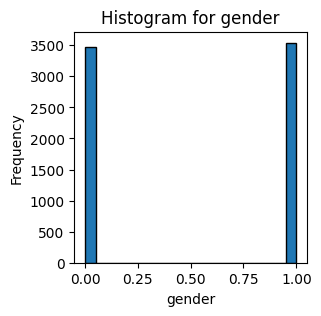

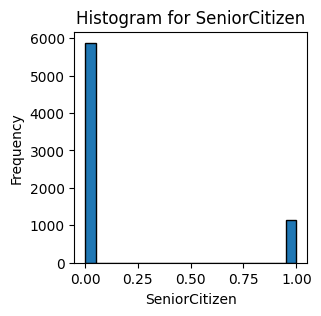

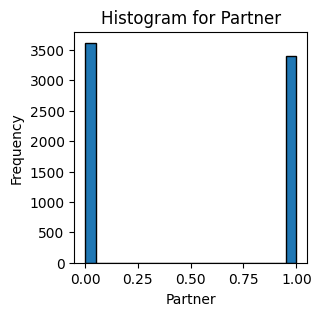

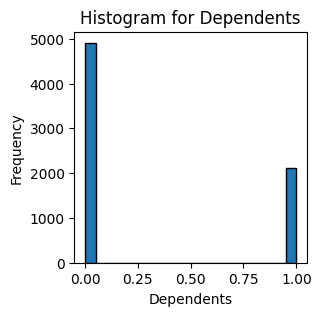

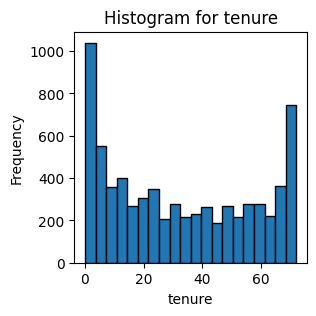

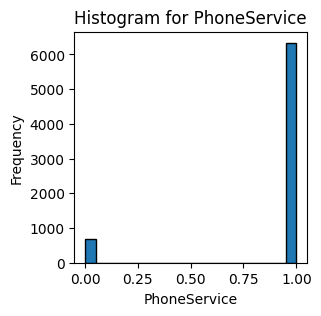

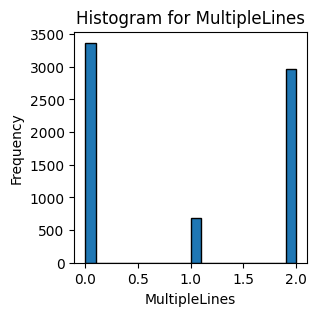

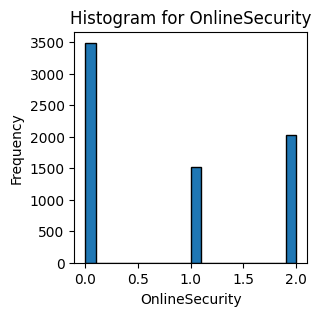

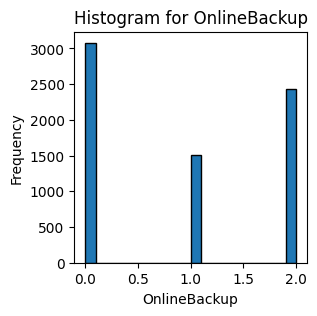

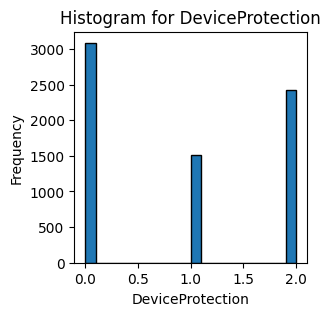

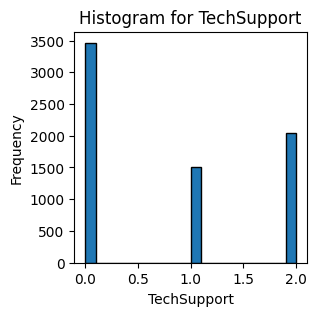

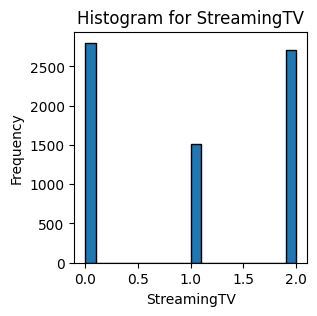

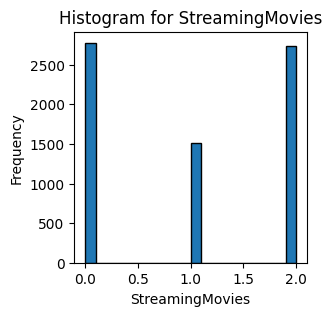

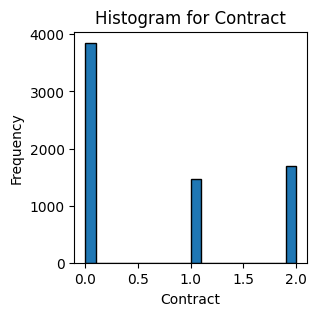

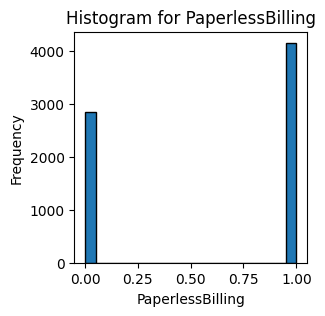

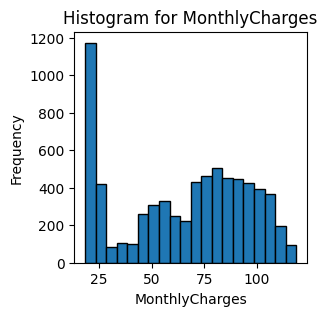

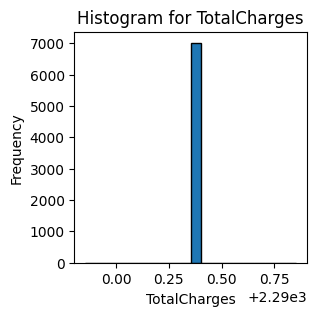

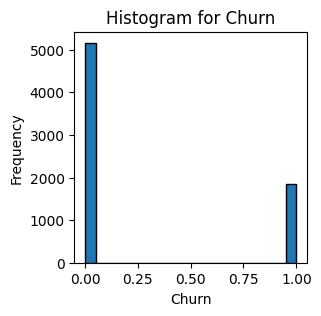

In [22]:
# Select numeric columns
numeric_columns = df_no_duplicates.select_dtypes(include='number')

# Create histograms for all numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(3, 3))
    plt.hist(numeric_columns[column], bins=20, edgecolor='k')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.show()

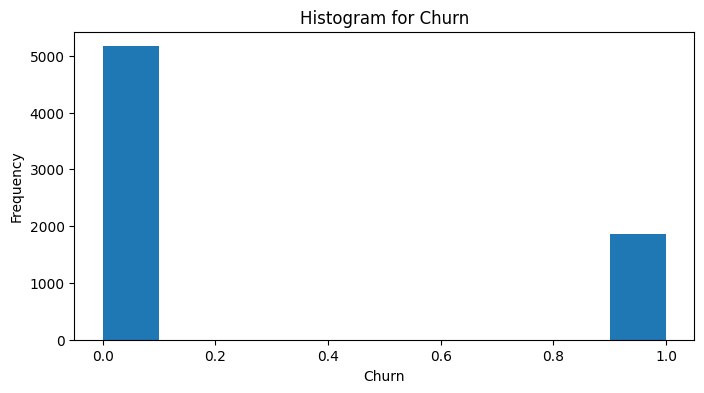

In [23]:
plt.figure(figsize=(8, 4))
plt.hist(df_no_duplicates['Churn'])
plt.title(f'Histogram for Churn')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

In [24]:
X = df_no_duplicates.drop(['Churn'], axis=1)
Y = df_no_duplicates['Churn']

In [25]:
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, Y, test_size=0.3, random_state=42)

In [27]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [28]:
# import seaborn as sns
# sns.pairplot(df_no_duplicates)
# plt.show()

In [29]:
# Define the classifiers and their hyperparameter grids
classifiers = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20],
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 1, 10],
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10, 20],
        }
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {}
    }
}

# Model evaluation and metrics
results = {}
for name, config in classifiers.items():
    clf = config['model']
    param_grid = config['param_grid']

    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)

    best_model = grid_search.best_estimator_

    # Cross-validation scores
    cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'best_model': best_model,
        'best_params': grid_search.best_params_,
        'mean_cv_accuracy': np.mean(cv_scores),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
    }

# Print the results
for name, result in results.items():
    print(f'{name}:')
    print(f'Best Parameters: {result["best_params"]}')
    print(f'Mean Cross-Validation Accuracy: {result["mean_cv_accuracy"]}')
    print(f'Accuracy on Test Set: {result["accuracy"]}')
    print(f'Precision: {result["precision"]}')
    print(f'Recall: {result["recall"]}')
    print(f'F1 Score: {result["f1_score"]}')
    print(f'Confusion Matrix:\n{result["confusion_matrix"]}\n')


Random Forest:
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Mean Cross-Validation Accuracy: 0.8586593412078176
Accuracy on Test Set: 0.7850023730422402
Precision: 0.7848765467969278
Recall: 0.7850023730422402
F1 Score: 0.7849392678335244
Confusion Matrix:
[[1330  226]
 [ 227  324]]

SVM:
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Mean Cross-Validation Accuracy: 0.8310803132132772
Accuracy on Test Set: 0.7612719506407214
Precision: 0.7706474309982253
Recall: 0.7612719506407214
F1 Score: 0.7652604686005325
Confusion Matrix:
[[1273  283]
 [ 220  331]]

K-Nearest Neighbors:
Best Parameters: {'n_neighbors': 3}
Mean Cross-Validation Accuracy: 0.7985079368735879
Accuracy on Test Set: 0.7028951115329853
Precision: 0.7524375981858255
Recall: 0.7028951115329853
F1 Score: 0.7176473263642575
Confusion Matrix:
[[1114  442]
 [ 184  367]]

Logistic Regression:
Best Parameters: {'C': 0.1}
Mean Cross-Validation Accuracy: 0.773422559572144
Accuracy on Test Set: 0.7541528239202658
Precision: 0

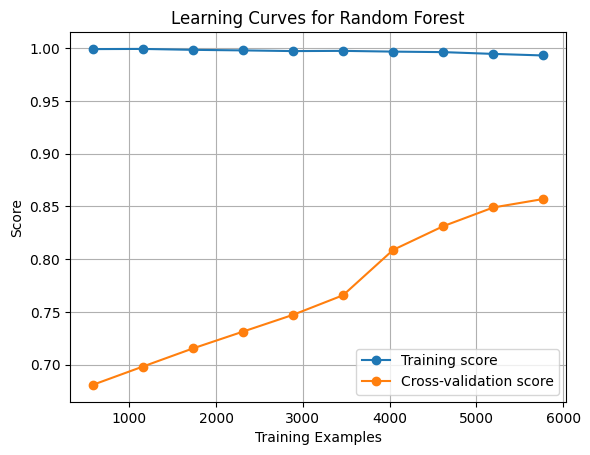

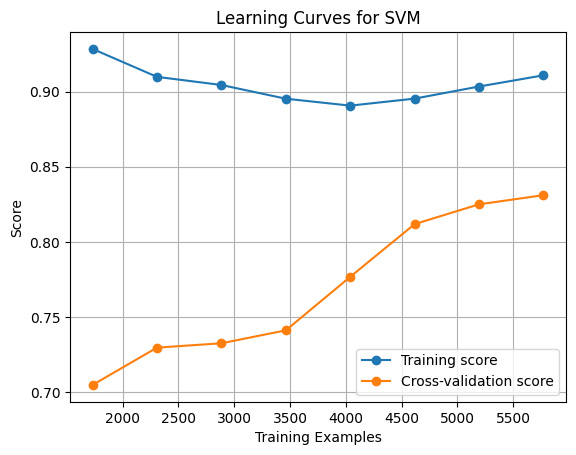

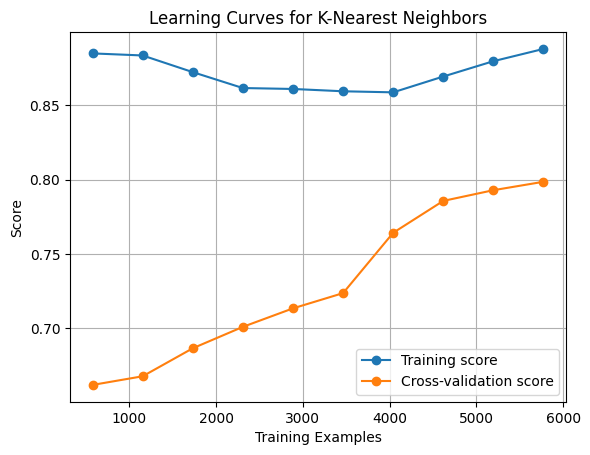

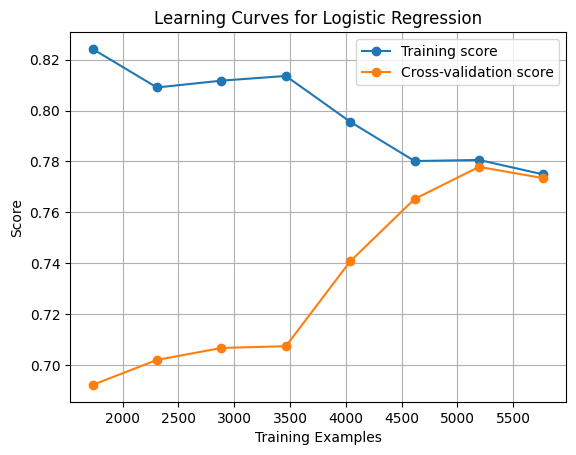

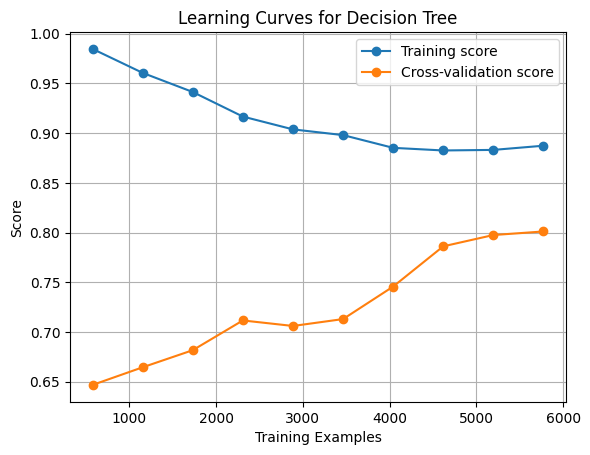

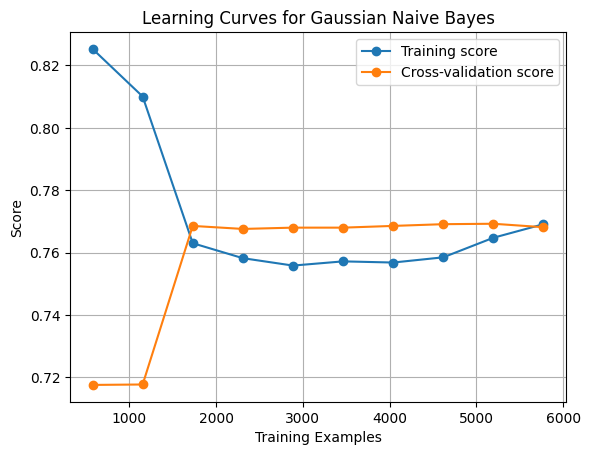

In [30]:
# Loop through classifiers
for name, result in results.items():
    best_model = result['best_model']
    
    # Calculate learning curves for the best model of each classifier
    train_sizes, train_scores, test_scores = learning_curve(best_model, X_resampled, y_resampled, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure()
    plt.title(f"Learning Curves for {name}")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")

    plt.legend(loc="best")
plt.show()

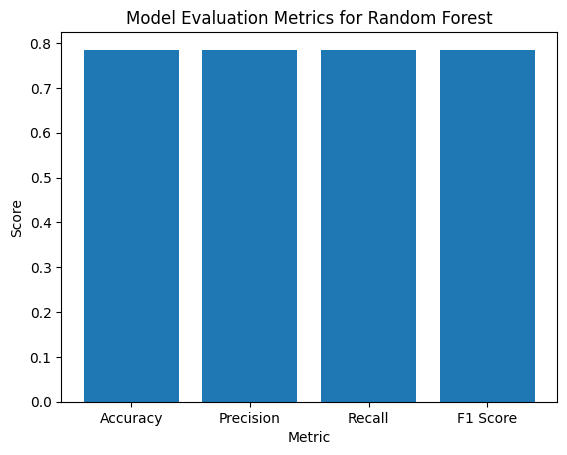

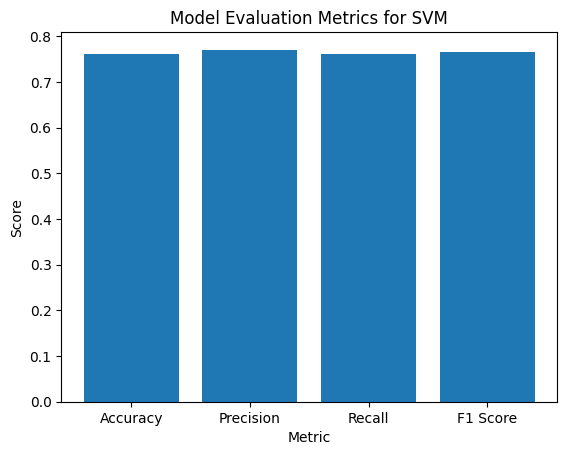

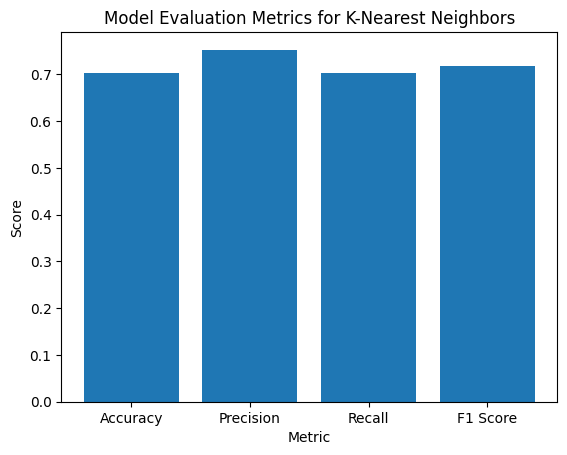

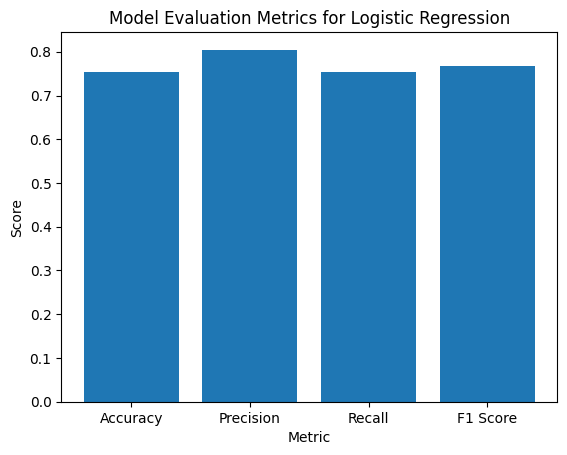

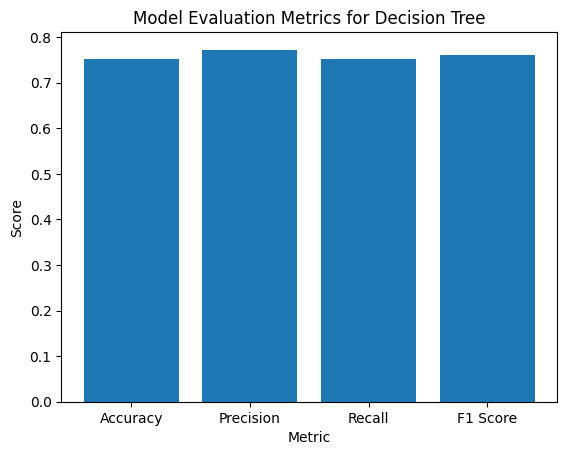

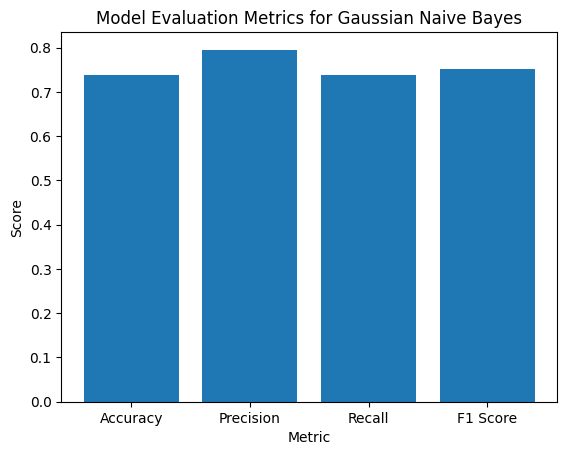

In [31]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Loop through classifiers
for name, result in results.items():
    values = [result['accuracy'], result['precision'], result['recall'], result['f1_score']]

    plt.figure()
    plt.bar(metrics, values)
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.title(f'Model Evaluation Metrics for {name}')
plt.show()